In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
data = pd.read_excel("Datos MIRaA35C Excel.xlsx", sheet_name=0, index_col=0).T
data.columns.name = "range"
data.index.name = "time"
data = xr.DataArray(data)
data["range"] = data.range / 1e3
data

<xarray.DataArray (time: 181, range: 255)>
array([[          nan, 4.6073753e-01, 3.4591949e-03, ...,           nan,
                  nan,           nan],
       [          nan, 8.5726732e-01, 1.0893992e-02, ...,           nan,
                  nan,           nan],
       [          nan, 2.1952423e-01, 2.8467255e-03, ...,           nan,
                  nan,           nan],
       ...,
       [5.1528413e-04, 8.4556732e+00, 8.1127457e-02, ...,           nan,
                  nan,           nan],
       [          nan, 2.4772184e+00, 2.5032753e-02, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]])
Coordinates:
  * time     (time) datetime64[ns] 2016-04-04T20:00:00 ... 2016-04-04T23:00:00
  * range    (range) float64 0.1559 0.1871 0.2183 0.2494 ... 8.013 8.044 8.075

In [3]:
data.range.attrs["long_name"] = "Height AGL"
data.range.attrs["units"] = "km"

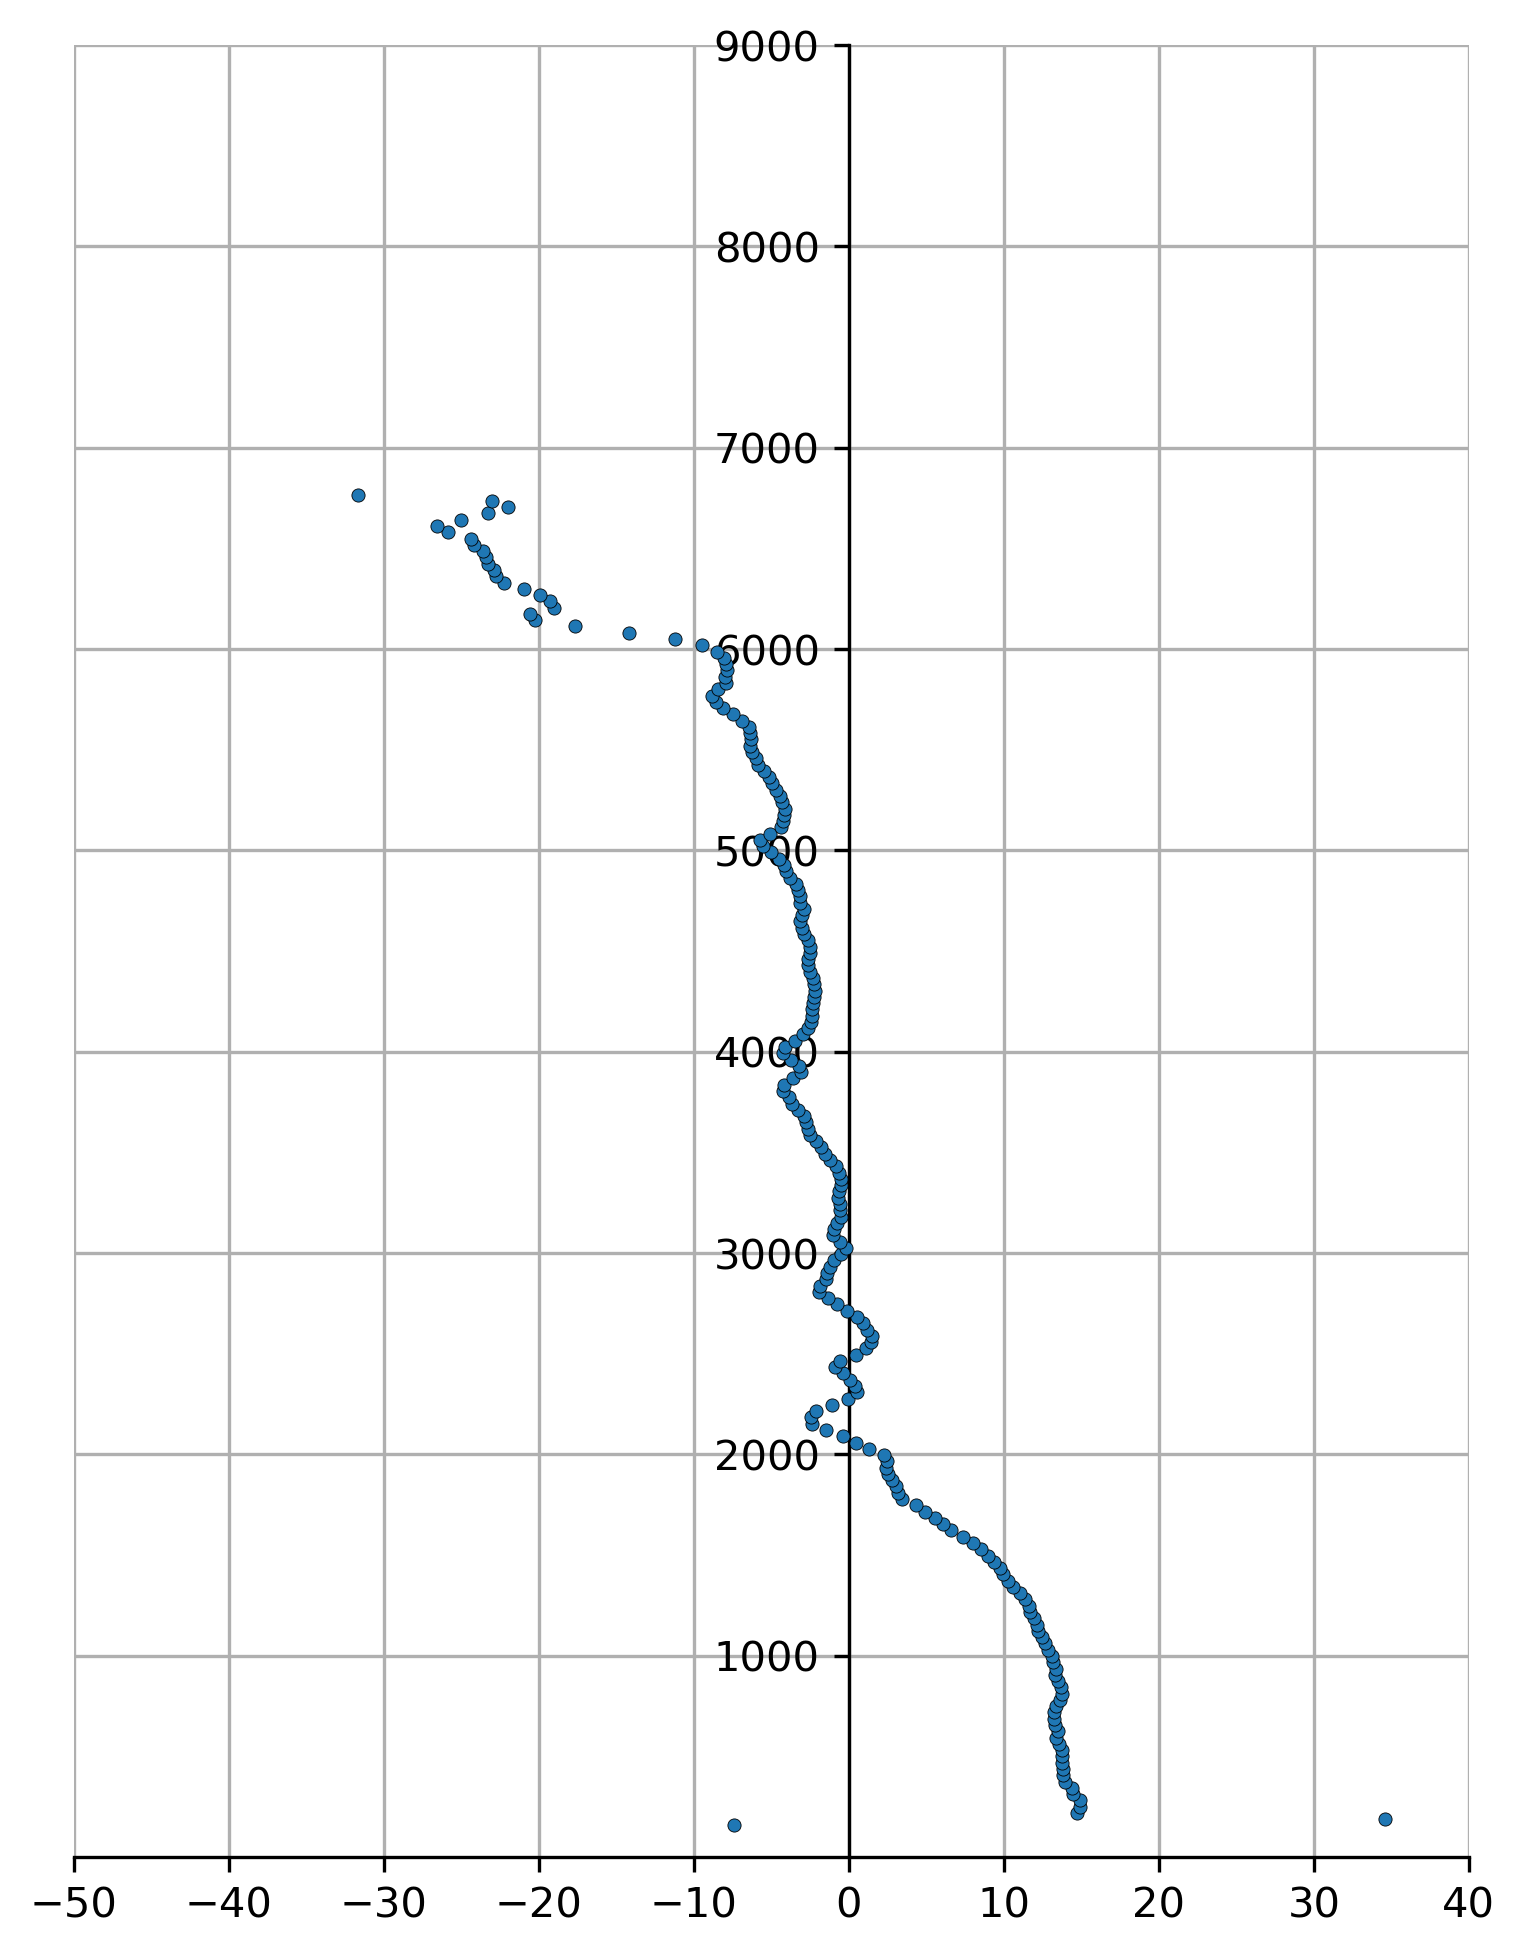

In [4]:
fig, ax = plt.subplots(dpi=300, figsize=(6, 8))
scat = 10 * np.log10(data.isel(time=50))
ax.scatter(scat.data, scat.range.data * 1e3, s=10, edgecolors="k", lw=0.2, zorder=30)
ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.set_ylim(0, 9e3)
ax.set_xlim(-50, 40)
ax.set_yticks(np.arange(1e3, 1e4, 1e3))
ax.grid()
# fig.savefig("fig1.png", bbox_inches="tight")

D:\Users\gerar\Anaconda3\envs\pangeo\lib\site-packages\xarray\core\computation.py:700: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


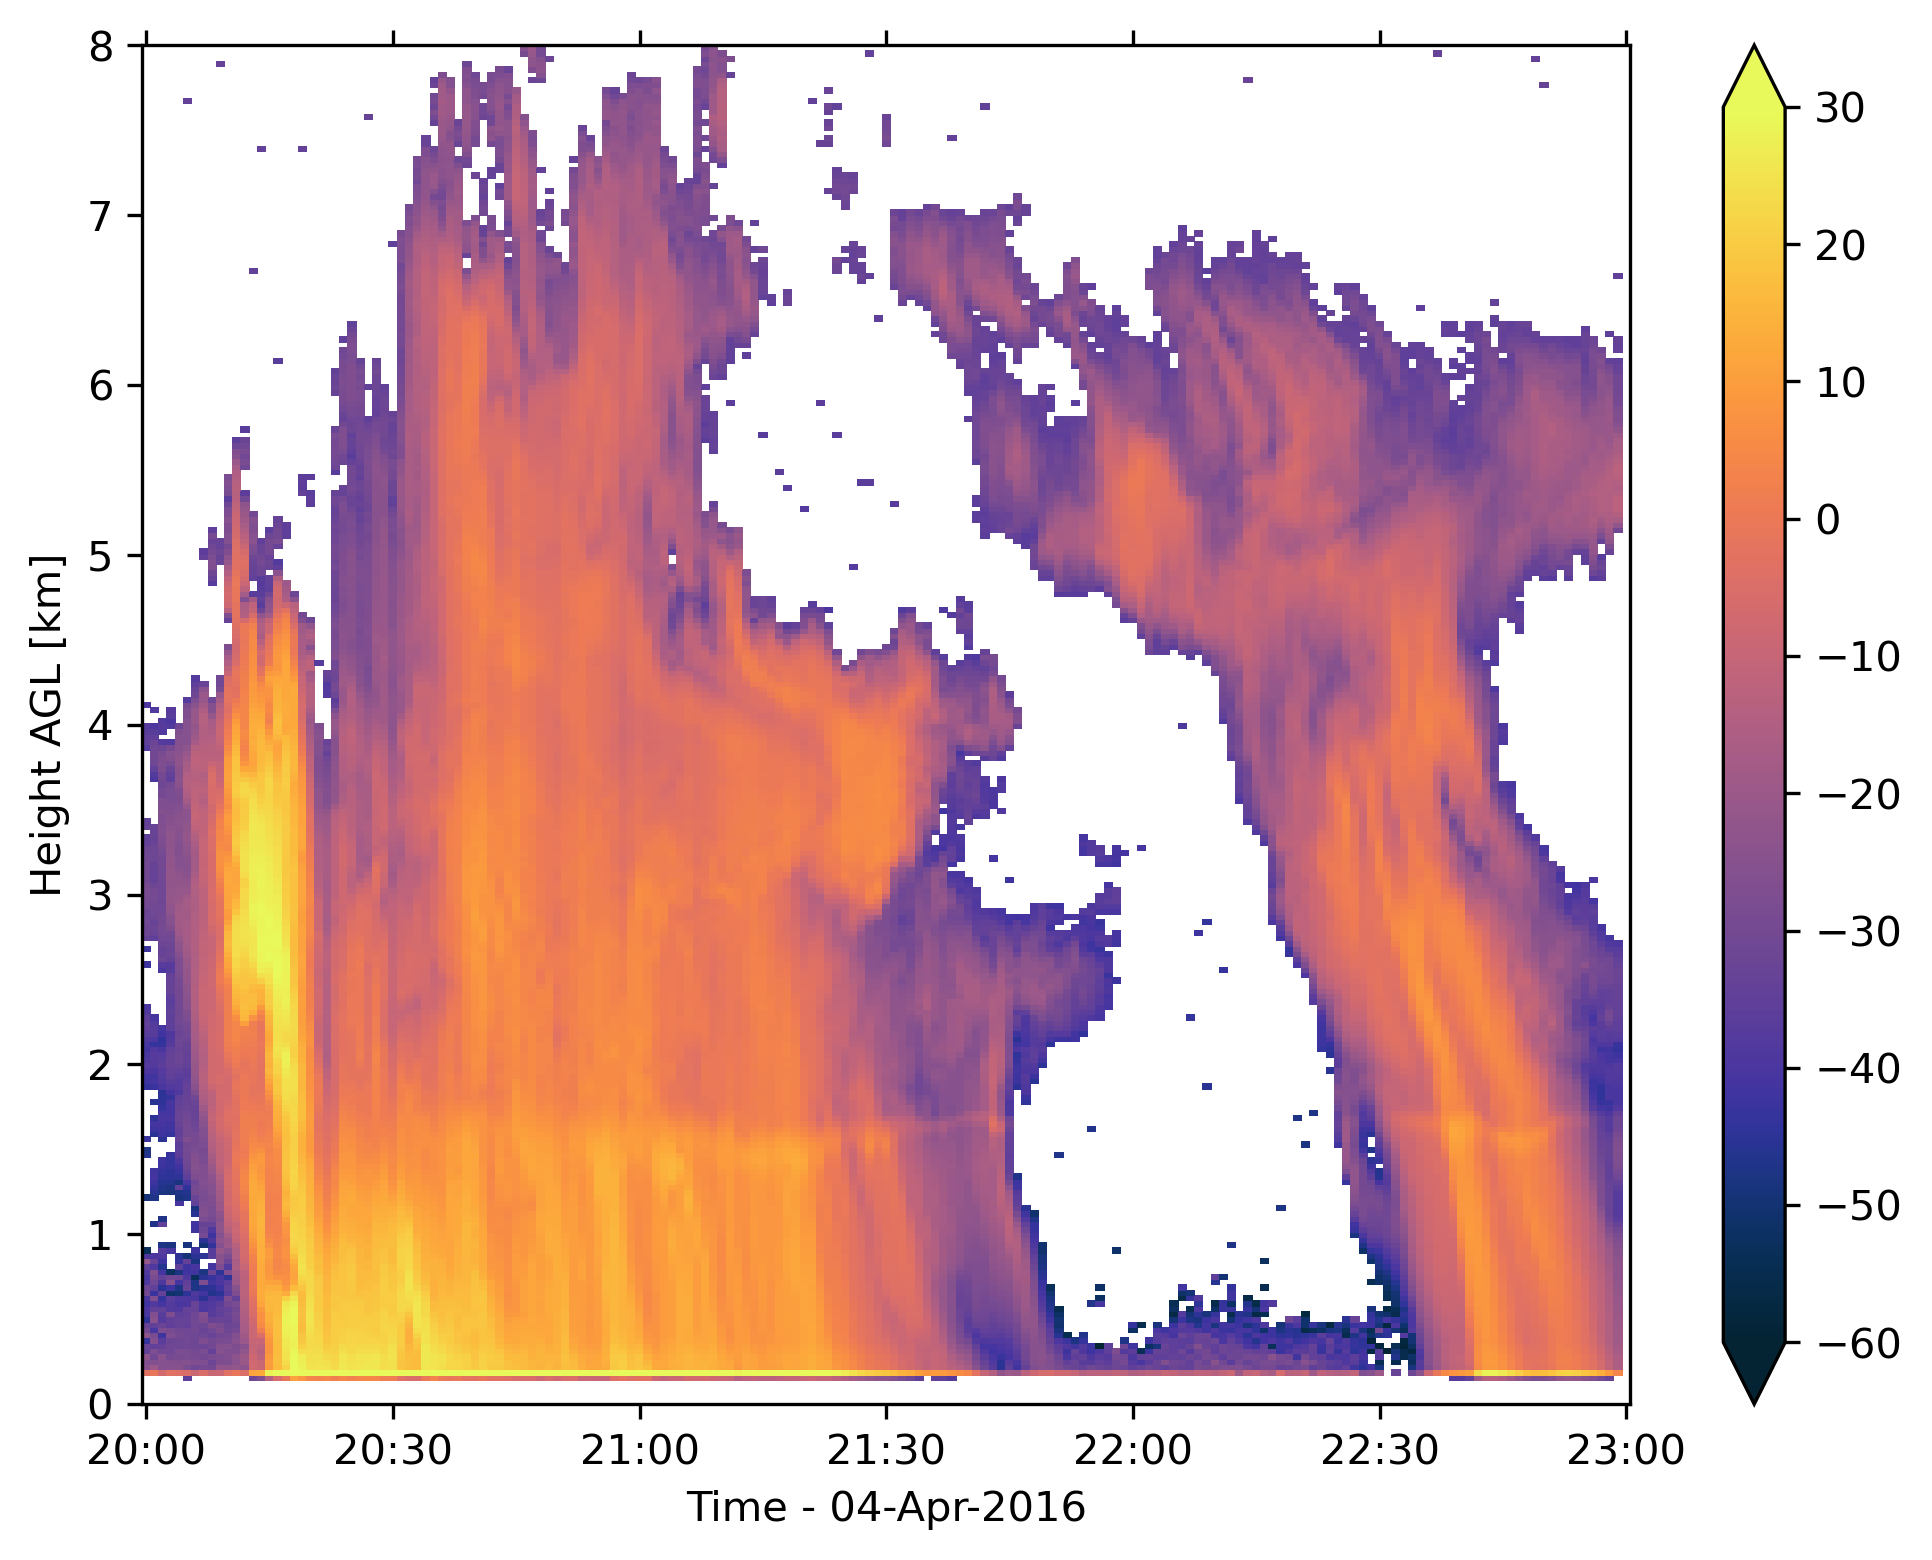

In [5]:
from matplotlib import dates

fig, ax = plt.subplots(dpi=300, figsize=(8, 6))
(10 * np.log10(data)).plot(x="time", vmax=30, vmin=-60, cmap=cmo.cm.thermal, ax=ax)
ax.set_ylim(0, 8)
minutes = dates.MinuteLocator(byminute=[0, 30])
mfmt = dates.DateFormatter("%H:%M")
ax.set_xlabel("Time - 04-Apr-2016")
ax.xaxis.set_major_locator(minutes)
ax.xaxis.set_major_formatter(mfmt)
ax.xaxis.set_tick_params(reset=True)
# fig.savefig("fig2.png", bbox_inches="tight")